In [23]:
from fastai.vision import *
import torch
torch.cuda.set_device(0)

In [24]:
path = untar_data(URLs.IMAGENETTE)

In [25]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train = 'train', valid = 'val', bs = 64, size = 224, ds_tfms = tfms).normalize(imagenet_stats)

In [ ]:
data.show_batch()

In [26]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy, pretrained = True)
learn.unfreeze()
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


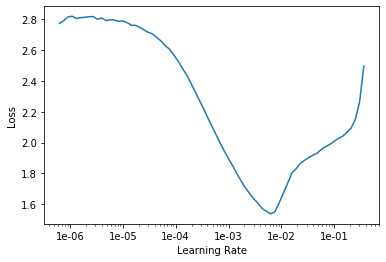

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(30, max_lr = 5e-3, callbacks=[callbacks.SaveModelCallback(learn, monitor = 'accuracy', mode = 'max')])

epoch,train_loss,valid_loss,accuracy,time
0,0.251867,0.195507,0.940000,00:49
1,0.402456,0.635372,0.804000,00:50
2,0.507558,0.670120,0.792000,00:50
3,0.569818,1.127996,0.654000,00:50
4,0.580815,1.069295,0.666000,00:50
5,0.580350,0.572389,0.812000,00:51
6,0.617145,0.500710,0.824000,00:51
7,0.603572,0.494599,0.834000,00:51
8,0.471958,0.500007,0.858000,00:49
9,0.466826,0.762105,0.774000,00:51


Better model found at epoch 0 with accuracy value: 0.9399999976158142.
Better model found at epoch 22 with accuracy value: 0.9459999799728394.
Better model found at epoch 25 with accuracy value: 0.9480000138282776.


In [29]:
learn.save('unfreeze_imagenet_bs64_new')

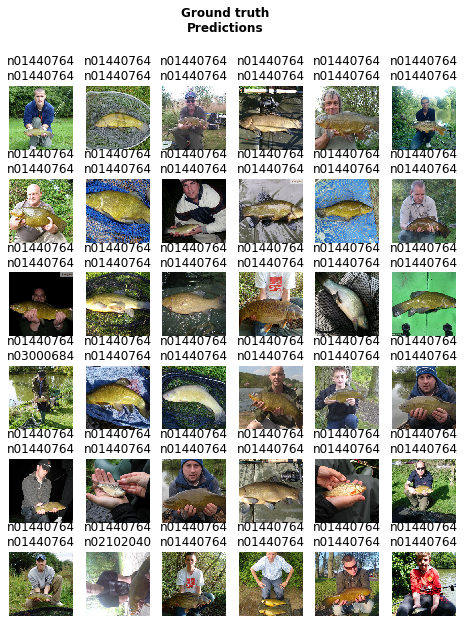

In [30]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy, pretrained = True)
learn.load('unfreeze_imagenet_bs64')
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))